In [61]:
import sys

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import csv
import pandas as pd
import scipy as sp

import torch

sys.path.insert(1, '../Thesis_Models/ml/')
import long_model
import utils
sys.path.insert(1, '../Thesis_Models/fitting/')
import tendeka_fit

import model_plot
import plot_tools
import raw_plot


In [2]:
xs = np.linspace(-4,4,1000)
tanh_vals = np.tanh(xs)
sigmoid_vals = 1/(1+np.exp(-xs))

Text(0, 0.5, 'f(x)')

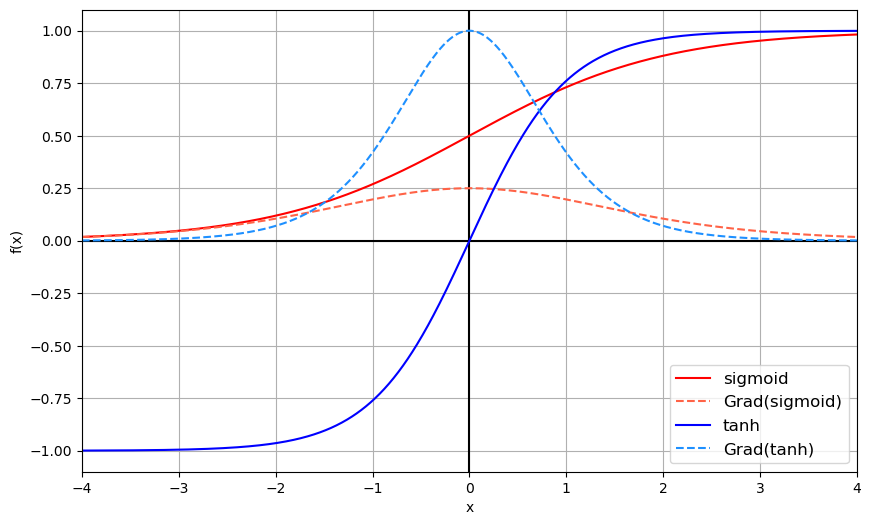

In [3]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_xlim(-4, 4)
ax.set_ylim(-1.1, 1.1)

ax.axhline(color='k')
ax.axvline(color='k')

ax.plot(xs, sigmoid_vals, 'r', label="sigmoid")
ax.plot(xs, sigmoid_vals * (1-sigmoid_vals), 'tomato', linestyle='dashed', label="Grad(sigmoid)")
ax.plot(xs, tanh_vals, 'blue', label="tanh")
ax.plot(xs, 1-tanh_vals**2, 'dodgerblue', linestyle='dashed', label="Grad(tanh)")

ax.legend(loc="lower right", fontsize='large')

ax.grid()

ax.set_xlabel("x")
ax.set_ylabel("f(x)")

In [4]:
def relu(x):
    if x <0:
        return 0
    else:
        return x

def grad_relu(x):
    if x < 0:
        return -0.005
    else:
        return 1
    
relu_vals = [relu(x) for x in xs]
grad_relu_vals = [grad_relu(x) for x in xs]

Text(0, 0.5, 'f(x)')

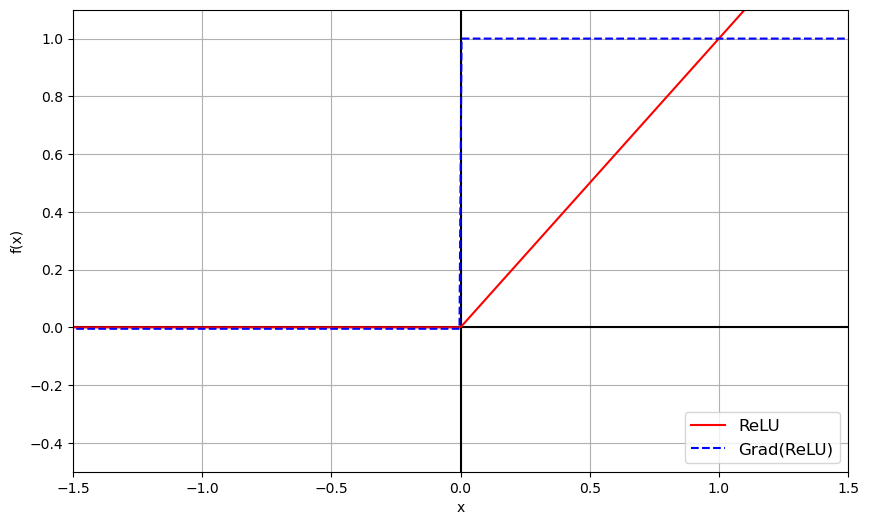

In [5]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-0.5, 1.1)

ax.axhline(color='k')
ax.axvline(color='k')

ax.plot(xs, relu_vals, 'r', label="ReLU")
ax.plot(xs, grad_relu_vals, 'b', linestyle='dashed', label="Grad(ReLU)")


ax.legend(loc="lower right", fontsize='large')

ax.grid()

ax.set_xlabel("x")
ax.set_ylabel("f(x)")

Text(0, 0.5, 'f(x)')

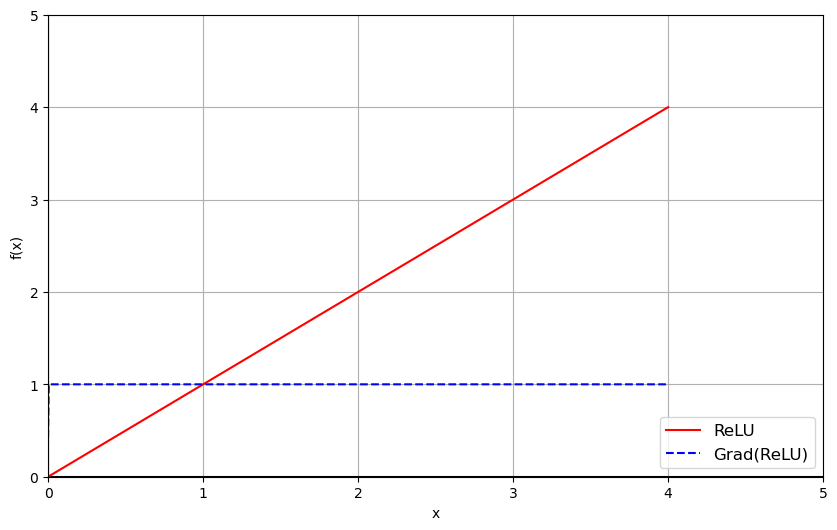

In [6]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_xlim(0, 5)
ax.set_ylim(0, 5)

ax.axhline(color='k')
ax.axvline(color='k')

ax.plot(xs, relu_vals, 'r', label="ReLU")
ax.plot(xs, grad_relu_vals, 'b', linestyle='dashed', label="Grad(ReLU)")


ax.legend(loc="lower right", fontsize='large')

ax.grid()

ax.set_xlabel("x")
ax.set_ylabel("f(x)")

# Training Losses

In [7]:
training_loss = np.loadtxt('trainingloss.csv', usecols=(2,), skiprows=1, delimiter=',')
validation_loss = np.loadtxt('validationloss.csv', usecols=(2,), skiprows=1, delimiter=',')

Text(0, 0.5, 'MSE loss')

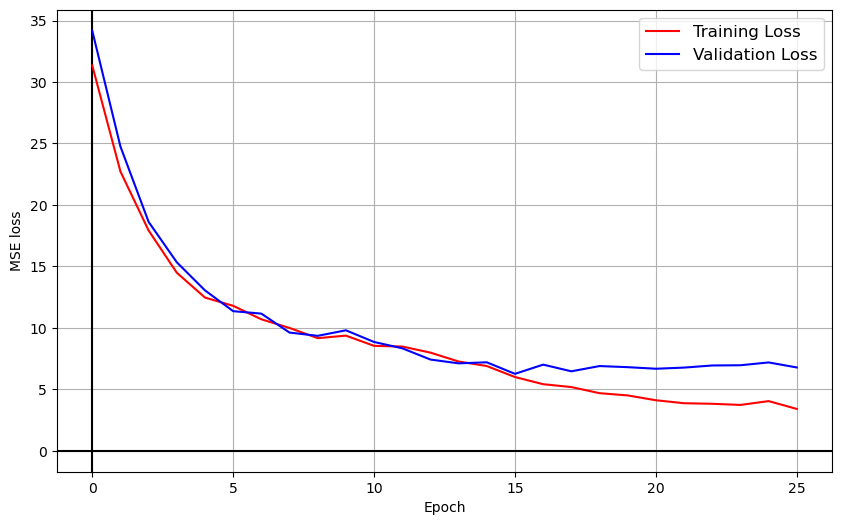

In [8]:
fig, ax = plt.subplots(figsize=(10,6))

#ax.set_xlim(0, 100)
#ax.set_ylim(-0.1, 1)

ax.axhline(color='k')
ax.axvline(color='k')

ax.plot(training_loss, 'r', label="Training Loss")
#ax.plot(training_loss[1:], 'g', linestyle='dashed', label="Training Loss shifted")
ax.plot(validation_loss, 'b', label="Validation Loss")


ax.legend(loc="upper right", fontsize='large')

ax.grid()

ax.set_xlabel("Epoch")
ax.set_ylabel("MSE loss")

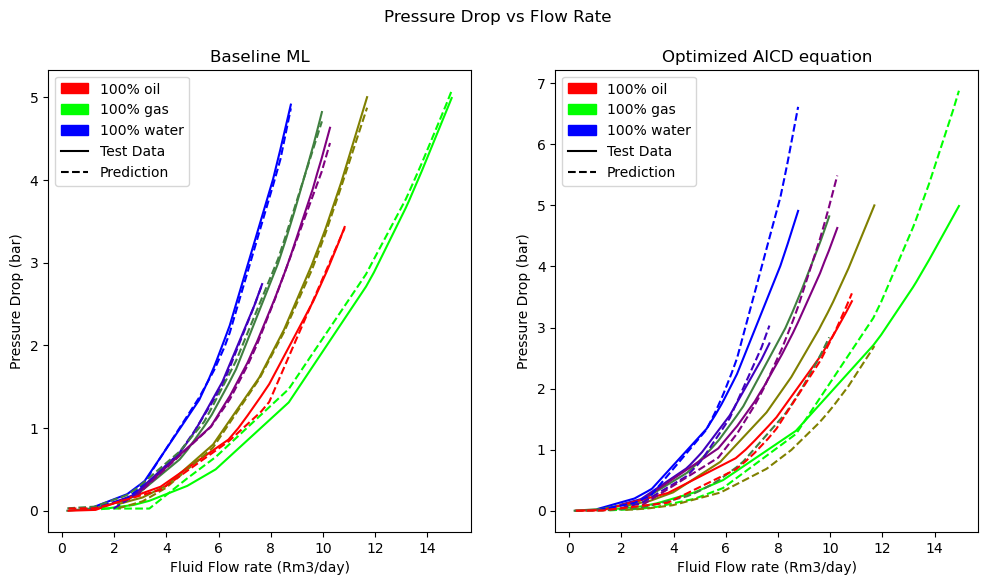

In [9]:
model = torch.jit.load('transfer-100-145model.pt')
model.eval()

#data = utils.getDataLoader('../Thesis_Data/100-145TestData.csv')
data = pd.read_csv('../Thesis_Data/100-145TestData.csv')
groups = data.groupby(['Oil Fraction', 'Gas Fraction', 'Water Fraction'])
iterator = 0
wanted = [0,1,14,6,7,10,11]
data = pd.DataFrame
for name, group in groups:
    if iterator == 0:
        data = group
    elif iterator in wanted:
        data = pd.concat([data, group])
    #print(f" i:{iterator} group: {name}")
    iterator = iterator + 1

    
fig = plt.figure(figsize=(12,6))
fig.suptitle("Pressure Drop vs Flow Rate")

title = "Baseline ML"
fig = model_plot.create_modelfigure(model, [], data, toTensor=True, subPlots = 121, fig=fig, title=title)
title = "Optimized AICD equation"
fig = model_plot.create_modelfigure(tendeka_fit.f, [0.87872028, 0.00336664, 3.14000662], data, subPlots = 122, fig = fig, title=title)

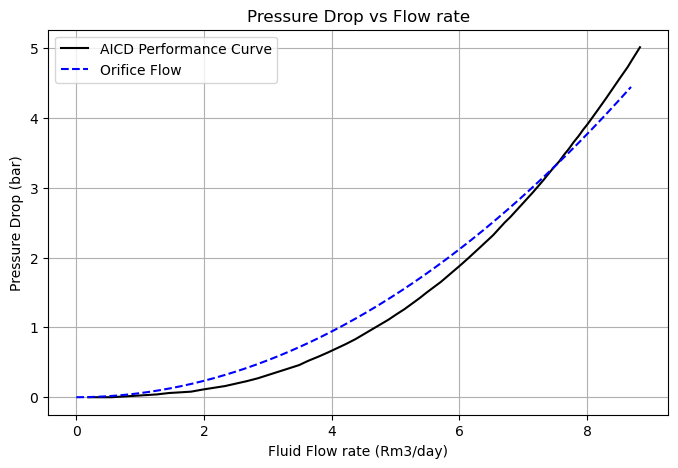

In [25]:
#data = utils.getDataLoader('../Thesis_Data/100-145TestData.csv')
raw_data = pd.read_csv('../Thesis_Data/100-145TrainingData.csv')
groups = raw_data.groupby(['Oil Fraction', 'Gas Fraction', 'Water Fraction'])
iterator = 0
wanted = []
data = pd.DataFrame
for name, group in groups:
    if iterator == 0:
        data = group
    elif iterator in wanted:
        data = pd.concat([data, group])
    #print(f" i:{iterator} group: {name}")
    iterator = iterator + 1

    
fig = plt.figure(figsize=(8,5))

title = "Baseline ML"
#fig = model_plot.create_modelfigure(model, [], data, toTensor=True, subPlots = 111, fig=fig, title=title)
ax = fig.add_subplot(111)
ax.set_title("Pressure Drop vs Flow rate")
param_dict = {"color": "black"}
plot_tools.insert_plot(ax, data, param_dict)


# Fit an oriffice flow to the same data
def f(x, a):
    return a * x**2
x_data = data['Rate']
y_data = data['DPtotal']
params, _ = sp.optimize.curve_fit(f, x_data.to_numpy(), y_data.to_numpy())
xs = np.arange(0,8.7,1/100)
ys = params * xs **2
plt.plot(xs, ys, 'blue', linestyle='--')

solid = mlines.Line2D([],[], color='black', marker='s', linestyle='solid', markersize=0, label='AICD Performance Curve')
dashed = mlines.Line2D([],[], color='blue', marker='s', linestyle='dashed', markersize=0, label='Orifice Flow')
ax.legend(handles=[solid, dashed])
#ReDo Legend at the end
plt.grid()

ValueError: ('0', '0', '1') is not a valid value for color

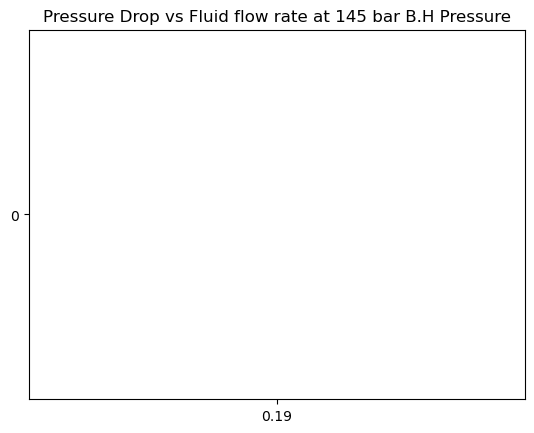

In [65]:
#data = utils.getDataLoader('../Thesis_Data/100-145TestData.csv')
raw_data = pd.read_csv('../Thesis_Data/completeDataTrimmed.csv')
bhvals = raw_data['B.H.Pressure'].copy()
data = raw_data.loc[bhvals.str.contains('145')]
#groups = raw_data.groupby(['Oil Fraction', 'Gas Fraction', 'Water Fraction'])
#iterator = 0
#data = pd.DataFrame
#for name, group in groups:
#    print(f" i:{iterator} group: {name}")
#    if '1' in name:
#        if iterator == 0:
#            data = group
#        else:
#            data = pd.concat([data, group])
#        iterator = iterator + 1

    
#fig = plt.figure(figsize=(8,5))

#fig = model_plot.create_modelfigure(model, [], data, toTensor=True, subPlots = 111, fig=fig, title=title)
#ax = fig.add_subplot(111)
#ax.set_title("Pressure Drop vs Flow rate")
#param_dict = {"color": "black"}
#plot_tools.insert_plot(ax, data, param_dict)

#raw_plot.create_rawfigure(raw_data, 145)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title(f"Pressure Drop vs Fluid flow rate at 145 bar B.H Pressure")

plot_tools.insert_plot(ax, data, {})